run with `popstrucure` env

In [2]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats
# import geopandas as gpd
# import rasterio
# from rasterio.plot import show
import seaborn as sns

In [3]:
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir="{}/results".format(proj_dir)

os.chdir(proj_dir)

In [4]:
#you can get this table from the SCAN dryad link
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


In [5]:
!pwd

/master/nplatt/sch_hae_its-nigeria


In [7]:
Path(f"{results_dir}/supervised_admixture/logs").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/supervised_admixture")

In [11]:
%%bash

conda run -n plink \
    plink \
        --vcf ../unsupervised_admixture/adm.vcf \
        --out adm \
        --double-id \
        --recode12 \
        --allow-extra-chr

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
urcell, Christopher Chang   GNU General Public License v3
recode 12 ...".2 flag deprecated.  Use "--
Logging to adm.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --out adm
  --recode 12
  --vcf ../unsupervised_admixture/adm.vcf

MB for main workspace.d; reserving 515643 

--vcf: 1k variants complete.
--vcf: 2k variants complete.
 complete.variants
--vcf: 4k variants complete.
--vcf: 5k variants complete.
--vcf: 6k variants complete.
vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: 9k variants complete.
ants complete.i
--vcf: 11k variants complete.
--vcf: 12k variants complete.
ete.f: 13k variants compl
--vcf: 14k variants complete.
--vcf: 15k variants complete.
--vcf: 16k variants complete.
: 17k variants complete.
--vcf: adm-temporary.bed + adm-temporary.bim + adm-temporary.fam written.
7369 variants loaded from .bim file.
.00 people (0 males, 0 females, 200 ambiguous) loaded fro

In [8]:
%%bash

# edit this to only include ingroup samples
conda run -n bcftools bcftools query -l ../unsupervised_admixture/adm.vcf >samples.list

In [13]:
info_df

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
0,c_Sh_NG_od_4_5,sh_ng_od_4_5,c_Sh_NG_od_4_5,NaN,shaematobium,nigeria,od,4.0,5.0
1,c_Sh_NG_bo_6_1,sh_ng_bo_6_1,c_Sh_NG_bo_6_1,NaN,shaematobium,nigeria,bo,6.0,1.0
2,c_Sh_NG_ed_2_1,sh_ng_ed_2_1,c_Sh_NG_ed_2_1,NaN,shaematobium,nigeria,ed,2.0,1.0
3,c_Sh_NG_kb_2_3,sh_ng_kb_2_3,c_Sh_NG_kb_2_3,NaN,shaematobium,nigeria,kb,2.0,3.0
4,c_Sh_NG_kb_2_6,sh_ng_kb_2_6,c_Sh_NG_kb_2_6,NaN,shaematobium,nigeria,kb,2.0,6.0
...,...,...,...,...,...,...,...,...,...
200,Sb_NG_au_2.8,Sb.ng.au.2.8R,Sb_NG_au_2.8,NaN,sbovis,nigeria,au,2.0,8.0
201,Sb_NG_be_1.4,Sb.ng.be.1.4R,Sb_NG_be_1.4,NaN,sbovis,nigeria,be,1.0,4.0
202,Sb_NG_be_3.2,Sb.ng.be.3.2F,Sb_NG_be_3.2,NaN,sbovis,nigeria,be,3.0,2.0
203,SRR11907394,sb_sbo_cdivoire_noumousso_107,sbo_cdivoire_noumousso_107,SRR11907394,sbovis,cdivoire,noumousso,NaN,NaN


## Supervised Admixture

In [24]:
#get sh references 
sh_refs = info_df.loc[ ((info_df["species"] == "shaematobium") & (info_df["country"] != "nigeria"))]
sh_refs

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
86,SRR11907426,se_sha_madag_belesalampy_77,sha_madag_belesalampy_77,SRR11907426,shaematobium,madagascar,belesalampy,NaN,NaN
87,SRR11907524,se_sha_namib_mayenzere_134,sha_namib_mayenzere_134,SRR11907524,shaematobium,namibia,mayenzere,NaN,NaN
88,SRR11907410,se_sha_pemba_uwandani_13,sha_pemba_uwandani_13,SRR11907410,shaematobium,zanzibar,uwandani,NaN,NaN
93,SRR11907435,se_sha_angola_icau_64,sha_angola_icau_64,SRR11907435,shaematobium,angola,icau,NaN,NaN
94,SRR11907484,se_sha_swaz_mkhuzweni_177,sha_swaz_mkhuzweni_177,SRR11907484,shaematobium,swaziland,mkhuzweni,NaN,NaN
95,SRR11907431,se_ssp_zambia_kafue_71,ssp_zambia_kafue_71,SRR11907431,shaematobium,zambia,kafue,NaN,NaN


In [23]:
#get sc references 
sc_refs = info_df.loc[ ((info_df["species"] == "scurassoni") & (info_df["country"] != "nigeria"))]
sc_refs

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
117,ERR5908628,NaN,sc_SAMEA104448987,ERR5908628,scurassoni,NaN,NaN,NaN,NaN
118,ERR3012902,NaN,sc_SAMEA104448991,ERR3012902,scurassoni,NaN,NaN,NaN,NaN
119,ERR5919555,NaN,sc_SAMEA5053754,ERR5919555,scurassoni,NaN,NaN,NaN,NaN
120,ERR5919556,NaN,sc_SAMEA5053755,ERR5919556,scurassoni,NaN,NaN,NaN,NaN
121,ERR5919559,NaN,sc_SAMEA5053758,ERR5919559,scurassoni,NaN,NaN,NaN,NaN
122,ERR5919562,NaN,sc_SAMEA5053761,ERR5919562,scurassoni,NaN,NaN,NaN,NaN
123,ERR5919564,NaN,sc_SAMEA5053763,ERR5919564,scurassoni,NaN,NaN,NaN,NaN


In [25]:
#get sb references 
sb_refs = info_df.loc[ ((info_df["species"] == "sbovis") & (info_df["country"] != "nigeria"))]
sb_refs

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
36,SRR11907395,sbo_cdivoire_foro_106,sbo_cdivoire_foro_106,SRR11907395,sbovis,cdivoire,foro,NaN,NaN
37,SRR11907458,sbo_uganda_apac13_35,sbo_uganda_apac13_35,SRR11907458,sbovis,uganda,apac13,NaN,NaN
124,ERR5919567,NaN,sb_SAMEA5059493,ERR5919567,sbovis,NaN,NaN,NaN,NaN
125,ERR5919543,NaN,sb_SAMEA8741113,ERR5919543,sbovis,NaN,NaN,NaN,NaN
203,SRR11907394,sb_sbo_cdivoire_noumousso_107,sbo_cdivoire_noumousso_107,SRR11907394,sbovis,cdivoire,noumousso,NaN,NaN
204,SRR11907383,sb_sbo_cdivoire_noumousso_117,sbo_cdivoire_noumousso_117,SRR11907383,sbovis,cdivoire,noumousso,NaN,NaN


In [30]:
tmp_df = pd.concat([sc_refs, sh_refs, sb_refs], ignore_index=True)

# randomly choose 3 rows per species
ref_df = (
    tmp_df.groupby("species", group_keys=False)
      .apply(lambda g: g.sample(n=3, random_state=42))
)

ref_df

/tmp/ipykernel_26291/2331690348.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=3, random_state=42))


,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
13,SRR11907395,sbo_cdivoire_foro_106,sbo_cdivoire_foro_106,SRR11907395,sbovis,cdivoire,foro,NaN,NaN
14,SRR11907458,sbo_uganda_apac13_35,sbo_uganda_apac13_35,SRR11907458,sbovis,uganda,apac13,NaN,NaN
18,SRR11907383,sb_sbo_cdivoire_noumousso_117,sbo_cdivoire_noumousso_117,SRR11907383,sbovis,cdivoire,noumousso,NaN,NaN
0,ERR5908628,NaN,sc_SAMEA104448987,ERR5908628,scurassoni,NaN,NaN,NaN,NaN
1,ERR3012902,NaN,sc_SAMEA104448991,ERR3012902,scurassoni,NaN,NaN,NaN,NaN
5,ERR5919562,NaN,sc_SAMEA5053761,ERR5919562,scurassoni,NaN,NaN,NaN,NaN
7,SRR11907426,se_sha_madag_belesalampy_77,sha_madag_belesalampy_77,SRR11907426,shaematobium,madagascar,belesalampy,NaN,NaN
8,SRR11907524,se_sha_namib_mayenzere_134,sha_namib_mayenzere_134,SRR11907524,shaematobium,namibia,mayenzere,NaN,NaN
12,SRR11907431,se_ssp_zambia_kafue_71,ssp_zambia_kafue_71,SRR11907431,shaematobium,zambia,kafue,NaN,NaN


In [33]:
# read the list of all samples
samples = pd.read_csv("samples.list", header=None, names=["wgs_id"], sep="\t")

# merge with ref_df to assign species where available
merged = samples.merge(ref_df, on="wgs_id", how="left")

# fill NaN species values with "-"
merged["species"] = merged["species"].fillna("-")
merged[["wgs_id", "species"]].to_csv("populations.txt", sep="\t", index=False, header=False)
merged["species"].to_csv("adm.pop", sep="\t", index=False, header=False)

In [36]:
%%bash

#UNSUPERVISED 
#submit jobs to the cluster
QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y "  

CMD="conda run -n admixture admixture --supervised --cv=1000 -j24 adm.ped 3 >supervised_adm_3.log"

echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N sadm_k3 -o supervised_adm_3.sge.log -pe smp 24


Your job 1659265 ("sadm_k3") has been submitted


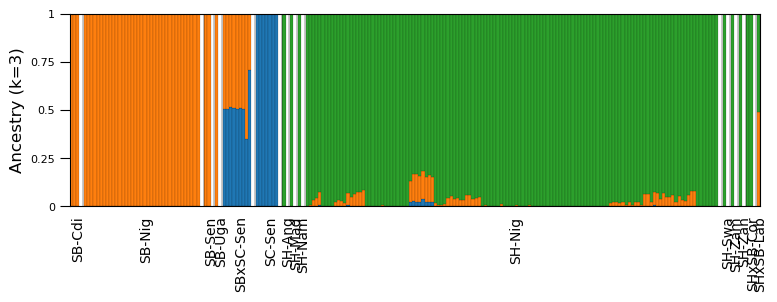

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

cm = 1 / 2.54  # cm to inches

species_labels = {'sbovis':       "SB", 
                  'sbxsc':        "SBxSC", 
                  'scurassoni':   "SC", 
                  'shaematobium': "SH",
                  'shxsb':        "SHxSB"}

# Load sample list
samples = open("samples.list").read().splitlines()[:-1]

# Load metadata
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")

# Set K values to plot
gap_size = 1.5  # space between populations

k=3

figsize = (20 * cm, 8 * cm)
# figsize = (20, 8)
fig, ax = plt.subplots(figsize=figsize)

# Load Q matrix and attach sample names
adm_df = pd.read_csv(f"adm.{k}.Q", sep=" ", header=None)
adm_df["wgs_id"] = samples

# Merge with metadata and sort by group
adm_df = adm_df.merge(info_df, how="left", on="wgs_id")
adm_df = adm_df.sort_values(by=["species", "country"]).reset_index(drop=True)
adm_df.to_csv("sup_adm_k3_df.csv", sep=",", header=True, index=False)

# Assign group labels
group_labels = []
group_positions = []
group_ids = []
prev_group = None
group_idx = -1

for i, row in adm_df.iterrows():
    species_abbr = species_labels[row["species"]]
    try:
        country_abbr = row["country"][:3].capitalize()
    except:
         country_abbr = "Unk"
    
    group = f"{species_abbr}-{country_abbr}"
    if group != prev_group:
        group_idx += 1
        group_labels.append(group)
        group_positions.append(i)
        prev_group = group
    group_ids.append(group_idx)

# Compute new x positions with gaps
sample_positions = []
current_offset = 0
prev_group_id = group_ids[0]

for i, group_id in enumerate(group_ids):
    if i > 0 and group_id != prev_group_id:
        current_offset += gap_size
    sample_positions.append(current_offset)
    current_offset += 1
    prev_group_id = group_id

# Plot stacked bars at new x positions
bottom = [0] * len(adm_df)
for p_comp in range(k):
    ax.bar(
        sample_positions,
        adm_df[p_comp],
        bottom=bottom,
        edgecolor="black",
        linewidth=0.1,
        width=1.0
    )
    bottom = [b + adm_df[p_comp].iloc[i] for i, b in enumerate(bottom)]

# Add vertical lines and abbreviated group labels
for i, label in enumerate(group_labels):
    start = sample_positions[group_positions[i]]
    end = sample_positions[group_positions[i + 1]] if i + 1 < len(group_positions) else sample_positions[-1] + 1
    center = (start + end) / 2
    if i > 0:
        ax.axvline(start - (gap_size / 2), color="black", linewidth=0.3)
    ax.text(center, -0.05, label, rotation=90, ha="center", va="top", fontsize=10, clip_on=False)

# Aesthetic settings
ax.set_ylabel(f"Ancestry (k={k})", fontsize=12)
ax.set_xlim(-0.5, sample_positions[-1] + 0.5)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8)
ax.tick_params(length=7, labelbottom=False)
plt.tight_layout()

# Save or show
plt.savefig(f"admix_k{k}.svg", bbox_inches="tight")
plt.savefig(f"admix_k{k}.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


In [10]:
!pwd

/master/nplatt/sch_hae_its-nigeria/results/supervised_admixture


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cm = 1 / 2.54  # cm to inches

species_labels = {'sbovis':       "SB", 
                  'sbxsc':        "SBxSC", 
                  'scurassoni':   "SC", 
                  'shaematobium': "SH",
                  'shxsb':        "SHxSB"}

# Load sample list
samples = open("samples.list").read().splitlines()[:-1]

# Load metadata
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")

# Set K values to plot
gap_size = 1.5  # space between populations

k=3

figsize = (20 * cm, 8 * cm)
# figsize = (20, 8)
fig, ax = plt.subplots(figsize=figsize)

# Load Q matrix and attach sample names
adm_df = pd.read_csv(f"adm.{k}.Q", sep=" ", header=None)
adm_df["wgs_id"] = samples

# Merge with metadata and sort by group
adm_df = adm_df.merge(info_df, how="left", on="wgs_id")
adm_df = adm_df.sort_values(by=["species", "country"]).reset_index(drop=True)
adm_df.to_csv("sup_adm_k3_df.csv", sep=",", header=True, index=False)

In [ ]:
# MANUALLY EDIT SUP_ADM_K3_DF.CSV to have the desired groups

In [17]:
adm_df = pd.read_csv("sup_adm_k3_df.mod.csv", sep=",", header=0)
adm_df

,0,1,2,wgs_id,its_id,sra,species,country,locale,patient,miracidum,adm_group,adm_xorder
0,0.999980,0.000010,0.000010,ERR3012902,NaN,ERR3012902,scurassoni,senegal,na,na,na,scurassoni,1
1,0.999980,0.000010,0.000010,ERR5908628,NaN,ERR5908628,scurassoni,senegal,na,na,na,scurassoni,2
2,0.999977,0.000013,0.000010,ERR5919555,NaN,ERR5919555,scurassoni,senegal,na,na,na,scurassoni,3
3,0.999980,0.000010,0.000010,ERR5919556,NaN,ERR5919556,scurassoni,senegal,na,na,na,scurassoni,4
4,0.999980,0.000010,0.000010,ERR5919559,NaN,ERR5919559,scurassoni,senegal,na,na,na,scurassoni,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000010,0.000010,0.999980,c_Sh_NG_os_2_2,Sh.ng.os.2.2F,NaN,shaematobium,nigeria,osun,2,2,shaematobium-south,196
196,0.000010,0.003044,0.996946,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11,shaematobium-south,197
197,0.000010,0.000010,0.999980,c_Sh_NG_os_3_3,sh_ng_os_3_3,NaN,shaematobium,nigeria,osun,3,3,shaematobium-south,198
198,0.000010,0.000010,0.999980,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5,shaematobium-south,199


In [20]:
df["0"]

0      0.999980
1      0.999980
2      0.999977
3      0.999980
4      0.999980
         ...   
195    0.000010
196    0.000010
197    0.000010
198    0.000010
199    0.000010
Name: 0, Length: 200, dtype: float64

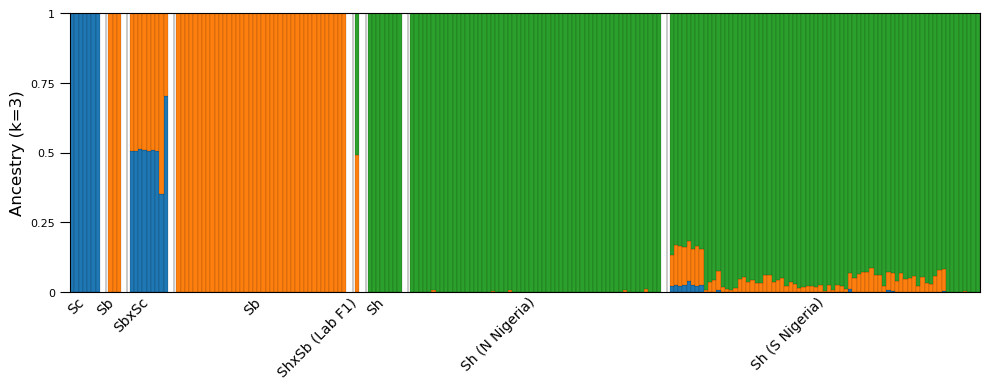

In [34]:
import numpy as np
import matplotlib.pyplot as plt

gap_size = 2  # the visible space you want between groups

df = adm_df.copy().sort_values("adm_xorder").reset_index(drop=True)

custom_labels = {
    "scurassoni": "Sc",
    "shaematobium": "Sh",
    "sbovis": "Sb",
    "sbxsc": "SbxSc",
    "shxsb": "ShxSb (Lab F1)",
    "shaematobium-north": "Sh (N Nigeria)",
    "shaematobium-south": "Sh (S Nigeria)",
}

# Identify contiguous runs of adm_group (data already sorted by group/order)
group_change = (df["adm_group"] != df["adm_group"].shift()).fillna(True).to_numpy()
df["run_id"] = np.cumsum(group_change) - 1  # 0,1,2,...

# Final x positions: base index + gap_size * (# prior groups)
# This keeps group 1 unchanged, group 2 shifted by gap_size, group 3 by 2*gap_size, etc.
df["xpos"] = df["adm_xorder"] + df["run_id"] * gap_size

# --- Plot stacked bars (K=3 fixed) ---
fig, ax = plt.subplots(figsize=(10, 4))
bottom = np.zeros(len(df), dtype=float)
for k in ("0", "1", "2"):
    vals = df[k].astype(float).to_numpy()
    ax.bar(
        df["xpos"], vals,
        bottom=bottom, width=1.0,
        edgecolor="black", linewidth=0.1
    )
    bottom += vals

# --- Group separators & labels (computed in shifted coords) ---
group_info = (
    df.groupby(["run_id", "adm_group"])["xpos"]
      .agg(start="min", end="max")
      .reset_index()
      .sort_values("run_id")
      .reset_index(drop=True)
)

# Separator at the midpoint of each gap: start_of_this_group - gap_size/2
for i in range(1, len(group_info)):
    start_this = group_info.loc[i, "start"]
    ax.axvline(start_this - gap_size/2, color="black", linewidth=0.3)

# --- Centered group labels under each block ---
for _, row in group_info.iterrows():
    center = 0.5 * (row["start"] + row["end"] + 1.0)
    group_name = row["adm_group"]
    # use custom label if present, otherwise fallback to original
    label_text = custom_labels.get(group_name, group_name)
    ax.text(
        center, -0.01, label_text,
        rotation=45, ha="right", va="top", fontsize=10, clip_on=False
    )

# --- Aesthetics ---
ax.set_ylabel("Ancestry (k=3)", fontsize=12)
ax.set_xlim(df["xpos"].min() - 0.5, df["xpos"].max() + 0.5)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8)
ax.tick_params(length=7, labelbottom=False)
plt.tight_layout()
plt.show()
plt.close()


In [1]:
!pwd

/master/nplatt/sch_hae_its-nigeria/code


In [67]:
adm_df = pd.read_csv("sup_adm_k3_df.csv", sep=",")
its_df=pd.read_csv(f"{proj_dir}/results/sanger/its_class.csv", sep=",", keep_default_na=False,)
adm_df = adm_df.merge(its_df, left_on=["wgs_id", "its_id"] , right_on=["wgs_id", "its_id"], how="left")
adm_df = adm_df.rename({"0": "adm0", "1": "adm1", "2": "adm2"}, axis=1)
adm_df.to_csv("sup_adm_k3_df.merged.csv", sep=",", header=True, index=False)
adm_df

,adm0,adm1,adm2,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,genotype_label,diagnostic_genotype,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,its_class
0,0.00001,0.999980,0.000010,SRR11907383,sb_sbo_cdivoire_noumousso_117,SRR11907383,sbovis,cdivoire,noumousso,na,na,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
1,0.00001,0.999980,0.000010,SRR11907394,sb_sbo_cdivoire_noumousso_107,SRR11907394,sbovis,cdivoire,noumousso,na,na,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
2,0.00001,0.999980,0.000010,SRR11907395,sbo_cdivoire_foro_106,SRR11907395,sbovis,cdivoire,foro,na,na,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
3,0.00001,0.999980,0.000010,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
4,0.00001,0.999980,0.000010,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00001,0.000010,0.999980,SRR11907431,se_ssp_zambia_kafue_71,SRR11907431,shaematobium,zambia,kafue,na,na,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-2_n1,AGCGC,A,G,C,G,C,SHxSH
196,0.00001,0.000010,0.999980,SRR11907410,se_sha_pemba_uwandani_13,SRR11907410,shaematobium,zanzibar,uwandani,na,na,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH
197,0.00001,0.000010,0.999980,SRR7743801,NaN,SRR7743801,shxsb,corsica,na,na,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,0.00001,0.000010,0.999980,SRR7743802,NaN,SRR7743802,shxsb,corsica,na,na,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
import numpy as np import matplotlib.pyplot as plt gap_size = 2 # the visible space you want between groups df = adm_df.copy().sort_values("adm_xorder").reset_index(drop=True) custom_labels = { "scurassoni": "Sc", "shaematobium": "Sh", "sbovis": "Sb", "sbxsc": "SbxSc", "shxsb": "ShxSb (Lab F1)", "shaematobium-north": "Sh (N Nigeria)", "shaematobium-south": "Sh (S Nigeria)", } # Identify contiguous runs of adm_group (data already sorted by group/order) group_change = (df["adm_group"] != df["adm_group"].shift()).fillna(True).to_numpy() df["run_id"] = np.cumsum(group_change) - 1 # 0,1,2,... # Final x positions: base index + gap_size * (# prior groups) # This keeps group 1 unchanged, group 2 shifted by gap_size, group 3 by 2*gap_size, etc. df["xpos"] = df["adm_xorder"] + df["run_id"] * gap_size # --- Plot stacked bars (K=3 fixed) --- fig, ax = plt.subplots(figsize=(10, 4)) bottom = np.zeros(len(df), dtype=float) for k in ("0", "1", "2"): vals = df[k].astype(float).to_numpy() ax.bar( df["xpos"], vals, bottom=bottom, width=1.0, edgecolor="black", linewidth=0.1 ) bottom += vals # --- Group separators & labels (computed in shifted coords) --- group_info = ( df.groupby(["run_id", "adm_group"])["xpos"] .agg(start="min", end="max") .reset_index() .sort_values("run_id") .reset_index(drop=True) ) # Separator at the midpoint of each gap: start_of_this_group - gap_size/2 for i in range(1, len(group_info)): start_this = group_info.loc[i, "start"] ax.axvline(start_this - gap_size/2, color="black", linewidth=0.3) # --- Centered group labels under each block --- for _, row in group_info.iterrows(): center = 0.5 * (row["start"] + row["end"] + 1.0) group_name = row["adm_group"] # use custom label if present, otherwise fallback to original label_text = custom_labels.get(group_name, group_name) ax.text( center, -0.05, label_text, rotation=45, ha="right", va="top", fontsize=10, clip_on=False ) # --- Aesthetics --- ax.set_ylabel("Ancestry (k=3)", fontsize=12) ax.set_xlim(df["xpos"].min() - 0.5, df["xpos"].max() + 0.5) ax.set_ylim(0, 1) ax.set_xticks([]) ax.set_yticks([0, 0.25, 0.5, 0.75, 1]) ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8) ax.tick_params(length=7, labelbottom=False) plt.tight_layout() plt.show() plt.close()

NameError: name 'adm' is not defined

In [37]:
!pwd

/master/nplatt/sch_hae_its-nigeria/results/supervised_admixture
